## Исследование данных о российском кинопрокате

Заказчик этого исследования — Министерство культуры Российской Федерации. Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [302]:
#блок загрузки библиотек
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [303]:
#код загрузки датасета
movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')
shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

Проведем первичный анализ датасетов

In [304]:
#функция для первичного ознакомления с ДатаСетом
def dataset_info(name_dataset): 
    display(name_dataset.head(5))
    print(name_dataset.info())
    print('Размерность DataFrame (строки, столбцы) ', name_dataset.shape)

In [305]:
dataset_info(movies)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [306]:
dataset_info(shows)

,puNumber,box_office
0,111000113,2450.000
1,111000115,61040.000
2,111000116,153030013.400
3,111000117,12260956.000
4,111000118,163684057.790


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB
None
Размерность DataFrame (строки, столбцы)  (3158, 2)


Общий столбец в обоих датасетах "puNumber" - номер прокатного удостоверения. Однако в movies значения столбца обладают типом object, а в shows тип int64. Перепроверимся: 1. Посмотрим уникальные значения; 2. 

In [307]:
#movies['puNumber'] = movies['puNumber'].astype('int')

При выполнении кода сверху появилась ошибка. Код ошибки: ValueError: invalid literal for int() with base 10: 'нет'. Это значит, что в столбце есть значения 'нет'. Найдём их.

In [308]:
#movies['puNumber'].unique() #много уникальных имен-чисел. Увидеть 'нет' не можем
#movies.query('puNumber == "нет"') # ещё можно и так найти
movies.loc[movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
#так как строчка одна, просто удалим её
movies = movies.loc[movies['puNumber'] != 'нет']

In [310]:
#перепроверка
movies.loc[movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [311]:
#преобразуем тип
movies['puNumber'] = movies['puNumber'].astype('int')

In [312]:
#создаём новый отдельный датафрейм. 
#Методом merge() объединим строки датафреймов по совпадающим значениям столбца puNumber:
data = movies.merge(shows, on='puNumber', how='outer')

In [313]:
#то что получилось после объединения. Кол-во столбцов 15 + 1 = верно; 7485 - не исзменилось так и должно было быть
data.shape

(7485, 16)

In [314]:
#проверяем добавление колонки box_office - сборы в рублях
data.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Считаю, что не правильный формат в колонке show_start_date — дата премьеры фильма

In [316]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'],format='%Y-%m-%dT%H:%M:%S')

Проверяем:

In [317]:
print (data['show_start_date'].head(3))

0   2015-11-27 12:00:00+00:00
1   2016-09-13 12:00:00+00:00
2   2016-10-10 12:00:00+00:00
Name: show_start_date, dtype: datetime64[ns, UTC]


•	ratings — рейтинг фильма на КиноПоиске

Проблемы: есть проценты и они очень большие. Уберем % и просто разделим на 10

In [318]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [319]:
data['ratings'] = data['ratings'].replace('\%', '',regex=True)
data['ratings'] = data['ratings'].astype(float)
data.loc[data['ratings'] >10, 'ratings'] = data['ratings'] / 10

In [320]:
#проверяем
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [321]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
title,0.000000
puNumber,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,8.000000
age_restriction,0.000000
refundable_support,96.000000


In [322]:
#красиво, но нужны цифры
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

•	film_studio — студия-производитель

In [323]:
data.loc[data['film_studio'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03 12:00:00+00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.300,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10 12:00:00+00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01 12:00:00+00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15 12:00:00+00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.000
6484,До и После,112014418,2018-12-05 12:00:00+00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.900,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05 12:00:00+00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06 12:00:00+00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Так как всего 18 студий, я решил обратиться к помощи интернета и вставить всё в ручную

In [324]:
data.loc[1293, 'film_studio'] = '7 разных студий'

In [325]:
data.loc[4440, 'film_studio'] = 'Пространство идей'

In [326]:
data.loc[6104, 'film_studio'] = 'Домашняя студия'

In [327]:
data.loc[6180, 'film_studio'] = 'Продюсерский центр «Молодёжные инициативы»'

In [328]:
data.loc[6378, 'film_studio'] = 'Домашняя студия'

In [329]:
data.loc[6379, 'film_studio'] = 'Домашняя студия'

In [330]:
data.loc[6398, 'film_studio'] = 'Домашняя студия'

In [331]:
data.loc[6484, 'film_studio'] = 'Домашняя студия'

In [332]:
data.loc[6493, 'film_studio'] = 'Домашняя студия'

In [333]:
data.loc[6496, 'film_studio'] = 'Домашняя студия'

In [334]:
data.loc[6497, 'film_studio'] = 'Домашняя студия'

In [335]:
data.loc[6498, 'film_studio'] = 'Домашняя студия'

In [336]:
data.loc[6506, 'film_studio'] = 'Домашняя студия' #идеальный пример сам придумал, сам снял, сам смонтировал

In [337]:
data.loc[6510, 'film_studio'] = 'Домашняя студия'

In [338]:
data.loc[6637, 'film_studio'] = 'Домашняя студия'

In [339]:
data.loc[6638, 'film_studio'] = 'Домашняя студия'

In [340]:
data.loc[6661, 'film_studio'] = 'Домашняя студия'

In [341]:
data.loc[6721, 'film_studio'] = 'Домашняя студия'

За поиском в первую очередь обратился на сайт Кинопоиска. Мои выводы таки: данный фильмы "кустарного производства". Режисер Сценарий, Продюсер это всё одно лицо. Бюджет фильмов минимальный. Скорее всего Кинопоиск их сам не знал как ранжировать.  

Ниже представлен прекрасный пример такого фильма

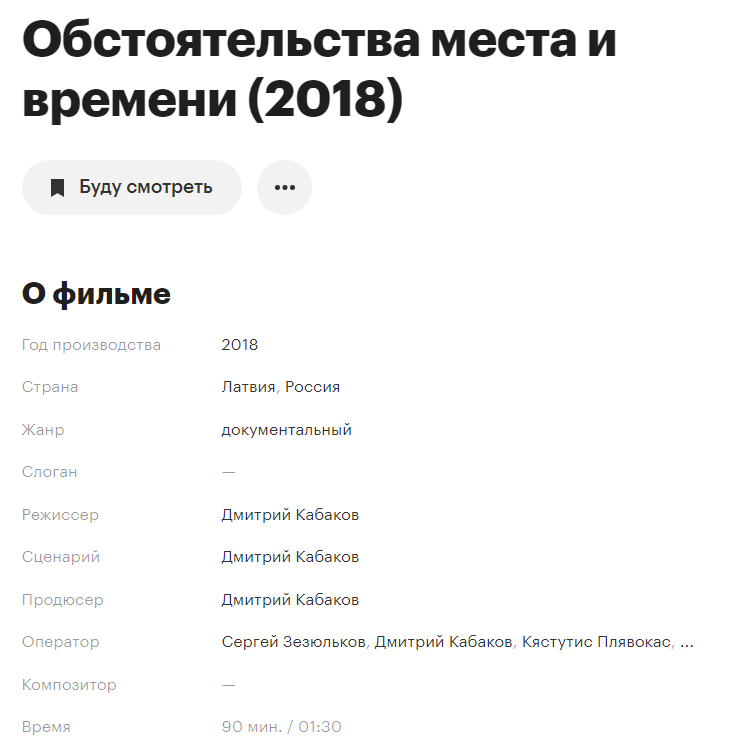

•	production_country — страна-производитель

In [342]:
data.loc[data['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.200,"детский,комедия",194527.000
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Пространство идей,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN


Детский юмористический киножурнал "Ералаш" и Мульт личности. Выпуск 5 сделаны в России. Так и заполним.

In [343]:
data.loc[data['production_country'].isna() == True, 'production_country'] = 'Россия'

In [344]:
#проверим
data.loc[data['production_country'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


•	director — режиссёр

In [345]:
data.loc[data['director'].isna() == True]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.000
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.900,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,Пространство идей,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.000,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.700,"концерт,музыка",NaN


Так как всего 9 режисеров, я решил обратиться к помощи интернета и вставить всё в ручную

In [346]:
data.loc[764, 'director'] = 'Вальдбюне Театр'

In [347]:
data.loc[1735, 'director'] = 'Творческий коллектив Британского музея'

In [348]:
data.loc[3839, 'director'] = 'Вера Строева'

In [349]:
data.loc[4051, 'director'] = 'Кристиан Тееде'

In [350]:
data.loc[4297, 'director'] = 'Музыкальный концерт'

In [351]:
data.loc[4414, 'director'] = 'Музыкальный концерт'

In [352]:
data.loc[4440, 'director'] = 'Василий Пичул, Юрий Владовский'

In [353]:
data.loc[4922, 'director'] = 'Стивен Клеобери'

In [354]:
data.loc[4941, 'director'] = 'Блу Лич'

Во время заполнения обратил внимание, что в основном это все связано с записями концертов. Там режисеры не нужны.

В описании к проекту сказано: "Столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку". У столбцов refundable_support, nonrefundable_support, budget, financing_source одинаковое количество пропусков 7153 (96%). Это означает, что в базе нет данных по финансированию внебюджетных обязательств.

Пропуски в genres 975 (13%) и ratings 966 (13%). Я не нашел взаимосвязи в пропусках. Заполнять выделяя среднее по жанрам, считаю не правильно. В идеале нужно находить фильмы вручну на Кинопоиске и заносить данные.

То же самое сделаем и с пропущенными значениями в столбце producer 568 (8%), но это слишком большое значение чтобы его заполнить вручную.

In [355]:
#проверяемся
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

**Исмаил. Мы вроде не проходили значения-заглушки, но я так понял ты предлагаешь создать некую функцию для заполнения NaN в столбцах допустим нулями. Так то конечно можно сделать, но изменится ли логика датасета: пропусков НЕТ и вроде все значения есть, но они ведь заглушки! Они будут влиять на все математичесике значения в датасете**

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [356]:
#найдем явные дубликаты
data.duplicated().sum()

0

In [357]:
#нас больше всего интересуют дубликаты в номере прокатного удостоверения
data['puNumber'].duplicated().sum()

2

In [358]:
duplicateRows = data[data.duplicated(['puNumber'])]

In [359]:
#таким способом нахожу как посмотреть дубликаты
print (duplicateRows)

                                                  title   puNumber  \
4638  Иоанна - женщина на папском престоле /По роман...  221154310   
5067                                     Анализируй то!  221054410   

               show_start_date            type  \
4638 2010-12-17 12:00:00+00:00  Художественный   
5067 2010-05-25 12:00:00+00:00  Художественный   

                                            film_studio  \
4638   Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...   
5067  Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...   

                                production_country        director  \
4638  Германия - Великобритания - Италия - Испания  Зенке Вортманн   
5067                                           США  Гарольд Реймис   

                                        producer  \
4638  Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан   
5067             Джейн Розенталь, Паул Уэйнстейн   

                      age_restriction  refundable_support  \
4638  «16+» - для детей старше 

In [360]:
data.loc[data['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.000,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.600,"драма,мелодрама,история",NaN


In [361]:
data.loc[data['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.400,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.800,"комедия,криминал",NaN


Полностью повторяющих строк нет. Дубли прокатных удостоверений, это связано с тем, что под одним удостоверением выходило в прокат несколько фильмов. Дабы не потерять данные строки - удалять не буду.

**Исмаил. Я не считаю что что это "данные с с ошибками". Если посмотреть всю строчку целиком это абсолютно разные фильмы. Снизу я и объясняю свои действия почему не удаляю, тем что под одним удостоверением может выходить в прокат несколько фильмов. Так же абсолютно согласен что минус 2 значения не внесут проблем.**

In [362]:
#С помощью этой строчки можно удалить эти значения
#data.drop(labels = [5066,5067,4637,4638],axis = 0)

In [363]:
data['title'].duplicated().sum()

714

In [364]:
data[data.title.duplicated()].title

3                                            Особо опасен
4                                            Особо опасен
41                                           Алекс и Эмма
110     Гарри Поттер и орден Феникса /По роману Дж.К.Р...
113     Гарри Поттер и узник Азкабана /По роману Дж.К....
                              ...                        
7368                                            Невиновен
7415                               Отель "Гранд Будапешт"
7437                                                Зверь
7449                                        В тихом омуте
7473                                            Вторжение
Name: title, Length: 714, dtype: object

In [365]:
data.loc[data['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.800,"фантастика,боевик,триллер",NaN


In [366]:
#data.loc[(data['genres'].isna()) & (data['title'].duplicated(keep=False))]

Если прокатное удостоверение на фильм не выдавалось обладателю исключительных прав на этот фильм, то на один фильм может быть выдано несколько прокатных удостоверений лицензиатам на соответствующие способы использования фильма (при этом срок действия каждого прокатного удостоверения будет ограничиваться сроком действия соответствующего лицензионного договора). Источник:
https://legal.hse.ru/rndip/IP_consent

Данные дубликаты я не трогаю.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [367]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [368]:
data['type'].value_counts()

Художественный                4519
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [369]:
data['type'] = data['type'].str.strip()

In [370]:
#проверяем
data['type'].value_counts()

Художественный                5908
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Из-за пробела были не правильные значения "Художественный". Исправили.

In [371]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [372]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1592
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

Согласно Федеральногой закона Российской Федерации от 29 декабря 2010 г. N 436-ФЗ «О защите детей от информации, причиняющей вред их здоровью и развитию» имеется 5 категорий информационной продукции. Вопрос к значениям не имею.

In [373]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [374]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Указанных источников финансирования ужасно мало. Я так понимаю система Кинопоиска имеет автоматическую подгрузку данных государственных источников финансирования. В то же время частные источники не раскрываются по разным причинам. 

In [416]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [417]:
data['genres'].value_counts()

драма                          476
комедия                        352
мелодрама,комедия              222
драма,мелодрама,комедия        189
драма,мелодрама                183
                              ... 
биография,военный,драма          1
боевик,приключения,семейный      1
история                          1
история,криминал                 1
биография,музыка,мюзикл          1
Name: genres, Length: 742, dtype: int64

Наблюдаю следующее: значения на мой взгляд для интерпритации очень тяжелы! Фильм может быть со смешанным жанром, но работать с такими значениями очень сложно. Опирался на статью https://zen.yandex.ru/media/subcult/shpargalka-zriteliam-kakie-byvaiut-janry-kino-i-kak-ih-razlichat-611409fe00e2a54b2cd1f5fb

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Посмотрим просто значения

In [418]:
data['refundable_support'].unique()

array([         nan, 0.000000e+00, 5.000000e+07, 2.600000e+07,
       3.000000e+07, 1.500000e+07, 1.000000e+07, 2.000000e+07,
       7.153119e+06, 2.500000e+07, 4.000000e+07, 6.000000e+07,
       4.400000e+07, 2.900000e+07, 4.100000e+07, 3.600000e+07,
       3.500000e+06, 5.000000e+06, 1.900000e+07, 9.000000e+06,
       1.100000e+08, 1.700000e+07, 7.500000e+07, 1.500000e+08,
       3.800000e+07, 1.000000e+08, 5.500000e+07, 7.000000e+06,
       7.346881e+06, 8.000000e+06, 1.150000e+08, 3.500000e+07,
       1.800000e+08, 2.800000e+07, 8.000000e+07])

In [419]:
data['nonrefundable_support'].unique()

array([           nan, 2.65000000e+07, 2.60000000e+07, 1.07847945e+08,
       2.80000000e+07, 2.50000000e+07, 1.00000000e+08, 4.65022990e+07,
       7.50000000e+07, 3.40000000e+07, 3.00000000e+07, 4.00000000e+07,
       2.30000000e+07, 4.50000000e+07, 5.65790550e+07, 2.55000000e+07,
       2.75100000e+07, 1.00000000e+07, 2.40000000e+07, 2.45000000e+07,
       2.70000000e+07, 5.00000000e+06, 9.00000000e+07, 2.00000000e+07,
       7.00000000e+07, 9.70000000e+07, 2.44500000e+07, 5.00000000e+07,
       0.00000000e+00, 6.00000000e+07, 2.75000000e+07, 2.69500000e+07,
       1.10000000e+08, 1.50000000e+07, 5.90000000e+07, 2.50000000e+08,
       3.70000000e+07, 3.50000000e+07, 2.01452850e+07, 2.59000000e+07,
       6.00000000e+06, 3.92104482e+08, 2.52000000e+07, 2.29040000e+07,
       2.90000000e+07, 5.10000000e+07, 4.70000000e+06, 5.30000000e+06,
       2.17000000e+07, 2.49860000e+07, 2.53450000e+07, 1.33000000e+08,
       1.75000000e+08, 3.01239150e+07, 2.85000000e+07, 3.00000000e+08,
      

In [420]:
data['budget'].unique()

array([           nan, 7.94119000e+07, 3.71428570e+07, 1.76023490e+08,
       4.05741400e+07, 4.00151220e+07, 5.18500000e+07, 2.20588394e+08,
       8.62100670e+07, 1.39551503e+08, 4.85714300e+07, 8.00000000e+07,
       3.62595000e+07, 7.08761720e+07, 2.52489571e+08, 7.49100000e+07,
       0.00000000e+00, 8.97823120e+07, 4.36437176e+08, 4.05000000e+07,
       6.84906060e+07, 4.50066090e+07, 1.31000000e+08, 5.00000000e+08,
       6.10114070e+07, 4.00000000e+07, 3.73712620e+07, 3.52969500e+07,
       4.30000000e+07, 7.74017510e+07, 3.50000000e+07, 5.11967110e+07,
       9.01200000e+07, 2.67288892e+08, 4.92804960e+07, 4.90714280e+07,
       4.69688830e+07, 5.51950000e+07, 1.56360666e+08, 3.74247960e+07,
       3.57600600e+07, 2.81155800e+07, 3.79436520e+07, 1.38325738e+08,
       4.22525090e+07, 3.99900000e+07, 1.12000000e+08, 5.57294240e+07,
       3.57142860e+07, 1.39357211e+08, 5.02187410e+07, 4.02650000e+07,
       3.90579710e+07, 9.25000000e+07, 4.14978600e+07, 8.62363940e+07,
      

In [421]:
data['box_office'].unique()

array([           nan, 2.70000000e+03, 3.60000000e+02, 4.20000000e+02,
       3.80000000e+02, 1.16500000e+03, 2.26600000e+04, 8.47200000e+04,
       1.79500000e+03, 3.00000000e+02, 6.75000000e+04, 0.00000000e+00,
       1.85000000e+03, 2.00000000e+02, 3.04000000e+03, 2.26000000e+03,
       2.89000000e+03, 1.97464500e+05, 3.96800000e+04, 5.00000000e+03,
       7.59526000e+05, 1.09381000e+06, 1.12530200e+06, 1.94876000e+06,
       4.80800000e+03, 8.43310000e+05, 1.02940000e+05, 1.30000000e+03,
       3.37000000e+03, 4.00000000e+01, 1.19600000e+04, 1.65000000e+02,
       1.00000000e+02, 1.52500000e+03, 5.20000000e+02, 2.06000000e+03,
       1.46500000e+04, 5.50000000e+02, 3.59450000e+04, 2.49000000e+03,
       4.60000000e+02, 1.50000000e+02, 8.64000000e+03, 4.05000000e+02,
       7.80000000e+03, 1.90000000e+03, 1.86000000e+04, 1.82500000e+03,
       1.02000000e+03, 2.81500000e+04, 3.27000000e+03, 1.14900000e+03,
       2.40000000e+03, 8.80000000e+02, 4.25000000e+02, 1.40000000e+03,
      

Для математической интерпритации данных, сгруппирум количественные значения

In [422]:
groups = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'ratings']
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [423]:
data[groups].describe()

,refundable_support,nonrefundable_support,budget,box_office,ratings
count,332.000,332.000,332.000,3158.000,6519.000
mean,11864457.831,48980988.892,127229716.684,76478696.161,6.488
std,24916555.264,59980117.923,188588333.115,240353122.823,1.115
min,0.000,0.000,0.000,0.000,1.000
25%,0.000,25000000.000,42000000.000,86239.000,5.900
50%,0.000,30000000.000,68649916.000,2327987.550,6.600
75%,15000000.000,40375000.000,141985319.500,23979671.025,7.200
max,180000000.000,400000000.000,2305074303.000,3073568690.790,9.900


In [424]:
data[groups].corr()

,refundable_support,nonrefundable_support,budget,box_office,ratings
refundable_support,1.000,0.360,0.641,0.312,-0.004
nonrefundable_support,0.360,1.000,0.594,0.456,0.126
budget,0.641,0.594,1.000,0.361,0.093
box_office,0.312,0.456,0.361,1.000,0.087
ratings,-0.004,0.126,0.093,0.087,1.000


•	ratings — рейтинг фильма на КиноПоиске значения в норме

Обратим внимание, что у них есть min = 0

•	refundable_support — объём возвратных средств государственной поддержки;

•	nonrefundable_support — объём невозвратных средств государственной поддержки;

•	budget — общий бюджет фильма;

•	box_office — сборы в рублях.

Как известно, в России производство кинематографа поддерживается Министерском культуры и Фондом кино. Избранные фильмы получают государственную поддержку. Причем для части фильмов такая государственная поддержка является безвозвратной, а для части - возвратной. То есть каким-то фильмам государство просто дает своего рода займ, который студия обязана вернуть государству после проката фильма. А для ряда фильмов государственная поддержка - это просто благотворительность. Компания получает деньги и не берет на себя никаких обязательств, кроме как создать киноленту.

Из выше указанного следует, что бюджет фильма не может быть равен 0 если в значениях объёма возвратных средств государственной поддержки и объёма невозвратных средств государственной поддержки есть хотя бы какое то значение не равное 0. Если посмотрим в данные

In [425]:
data[(data['refundable_support'] > data['budget'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.000,70000000.000,0.000,Фонд кино,7.800,"боевик,драма,криминал",196572438.400,2015,А.Андрианов
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.000,0.000,0.000,Фонд кино,6.200,"комедия,фэнтези",67418974.800,2015,Д.Штурманова
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.000,100000000.000,0.000,Фонд кино,4.600,"мультфильм,приключения,фэнтези",184487551.400,2015,М.Фадеев
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.000,51000000.000,0.000,Фонд кино,6.300,"комедия,мелодрама",70299052.000,2016,Д.Тюрин
3674,Чудо-юдо,114001817,2017-06-27 12:00:00+00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,20000000.000,20000000.000,0.000,Фонд кино,5.200,"мультфильм,фэнтези,семейный",55108014.760,2017,А.Лукичев
3738,Мифы,111004317,2017-06-07 12:00:00+00:00,Художественный,"ООО ""ХАЙПФИЛМ"", ООО ""Арт Пикчерс Студия""",Россия,А.Молочников,"Ф.Бондарчук, Д.Рудовский, И.Стюарт, М.Османн, ...",«16+» - для детей старше 16 лет,25000000.000,20000000.000,0.000,Фонд кино,4.800,комедия,50451949.000,2017,А.Молочников
5672,Селфи,111012117,2018-02-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Н.Хомерики,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,20000000.000,40000000.000,0.000,Фонд кино,5.800,"триллер,драма",225196400.030,2018,Н.Хомерики
5805,Два хвоста,114001018,2018-05-31 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"В.Ровенский, Н.Лопато, В.Азеев","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,10000000.000,60000000.000,0.000,Фонд кино,5.000,"мультфильм,детский",106514301.030,2018,В.Ровенский
6007,Принцесса и дракон,114003018,2018-08-23 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,М.Нефедова,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,40000000.000,40000000.000,0.000,Фонд кино,5.200,"мультфильм,фэнтези,детский",83366328.660,2018,М.Нефедова
6822,Большое путешествие,114002419,2019-04-20 12:00:00+00:00,Анимационный,"ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",Россия,"Н.Лопато, В.Ровенский","ООО ""ЛИЦЕНЗИОННЫЕ БРЕНДЫ""",«6+» - для детей старше 6 лет,60000000.000,120000000.000,0.000,Фонд кино,6.200,"мультфильм,комедия,приключения",147606826.510,2019,Н.Лопато


In [426]:
data[(data['nonrefundable_support'] > data['budget'])]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.000,23000000.000,0.000,"Министерство культуры, Фонд кино",6.600,мелодрама,10234016.100,2014,А.Зайцев
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,75000000.000,0.000,Фонд кино,6.600,драма,446163511.000,2015,Р.Прыгунов
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.000,70000000.000,0.000,Фонд кино,7.800,"боевик,драма,криминал",196572438.400,2015,А.Андрианов
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.000,100000000.000,0.000,Фонд кино,4.600,"мультфильм,приключения,фэнтези",184487551.400,2015,М.Фадеев
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.000,59000000.000,0.000,Фонд кино,6.300,"комедия,драма",1957738.510,2015,М.Местецкий
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.000,35000000.000,0.000,Фонд кино,5.100,"комедия,мелодрама",72937783.200,2015,С Чекалов
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.000,6000000.000,0.000,Министерство культуры,4.300,комедия,15362931.430,2016,В.Ровенский
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.000,51000000.000,0.000,Фонд кино,6.300,"комедия,мелодрама",70299052.000,2016,Д.Тюрин
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.000,250000000.000,0.000,Фонд кино,5.600,фантастика,1038321489.000,2016,Ф.Бондарчук
3674,Чудо-юдо,114001817,2017-06-27 12:00:00+00:00,Анимационный,"ООО ""КиноФирма""",Россия,А.Лукичев,"ООО ""КиноФирма""",«6+» - для детей старше 6 лет,20000000.000,20000000.000,0.000,Фонд кино,5.200,"мультфильм,фэнтези,семейный",55108014.760,2017,А.Лукичев


In [427]:
#так тоже можно увидеть что значения бюджета 0 а какая то поддержка есть
data.pivot_table(index= 'title', values = ['nonrefundable_support','refundable_support','budget']).sort_values(by='budget').head(20)

,budget,nonrefundable_support,refundable_support
title,,,
Чудо-юдо,0.000,20000000.000,20000000.000
Дуxless 2,0.000,75000000.000,0.000
Бармен.,0.000,0.000,20000000.000
Большое путешествие,0.000,120000000.000,60000000.000
Савва. Сердце воина,0.000,100000000.000,60000000.000
Селфи,0.000,40000000.000,20000000.000
Баба Яга,0.000,138969465.000,0.000
Помню - не помню!,0.000,6000000.000,0.000
Два хвоста,0.000,60000000.000,10000000.000


За программировать их слиянение не смог. Но впринциппе это дало бы до 10 % восстановления данных. Значение минимально и не влияет на анализ.

**Тут я так решил. Это же раздел "Предобработки" и углубляться в суть значений буду позже. Но уже из первички: 0 в бюджете значит не было прямой информации о бюджетировании. Значения по возврату / не возврату это очень сложные данные. Я уже внизу писал, что если есть эти значения, то поумолчанию бюджет уже не 0. Но тогда какой значение "МОЖНО" засунуть. По логике можно возврат + не озврат. А если одно больше другого, то это убыточные фильмы. А самое главное я побоялся испортить значения бюджета которые уже есть. Вообщем тут долго пришлось строить логические цепочки. Пытался написать алгорит - не получилось.**

Хотя можно побольше исследовать значения с 0 - такого ведь не может быть, возможно, стоит их поизучать, удалить, дать интерпретацию

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [428]:
data['show_start_year'] = data['show_start_date'].dt.year

In [429]:
#проверим
data['show_start_year']

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7480    2019
7481    2019
7482    2019
7483    2019
7484    2019
Name: show_start_year, Length: 7485, dtype: int64

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [430]:
data['director'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия',
       'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский, В.Усков',
       'М.Чиаурели', 'Лассе Халлстрем', 'Л.Гайдай', 'В.Чеботарев',
       'В.Азаров', 'Боривой Земан', 'Эндрю Никкол', 'Г.Мыльников',
       'Джонатан Кинг', 'И.Бабич', 'Даниэль Робишо', 'Грегори Хоблит',
       'Крис Нунан', 'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон',
       'Р.Быков', 'Роб Райнер', 'Бен Янгер', 'Роб Маршалл', 'Е.Ташков',
       'Н.Михалков', 'Ю.Карасик', 'А.Тарковский', 'Джон Франкенхаймер',
       'Оливье Маршал', 'С.Соловьев', 'Иоахим Реннинг, Эспен Сандберг',
       'Ролан Быков', 'Семен Туманов', 'Питер Сигал', 'М.Ромм',
       'Г.Полока', 'Ю.Райзман', 'Дрю Дэйуолт, Дэвид Шнейдер',
       'С.Самсонов', 'Айрон Блейз, Роберт Уокер', 'К.Шахн

In [431]:
data['director_first'] = data['director'].str.split(",").str[0]

In [432]:
#проверим
data['director_first'].unique()

array(['Кевин Костнер', 'Е.Матвеев', 'Тимур Бекмамбетов', 'В.Абдрашитов',
       'В.Меньшов', 'Джон Туртурро', 'Эрик Беснард', 'В.Титов',
       'Пол Грингросс', 'М.Туманишвили', 'Клинт Иствуд',
       'Фернанду Мейрелльеш', 'Майк Фиггис', 'А.Салтыков', 'Г.Данелия',
       'А.Смирнов', 'Ю.Чулюкин', 'В.Краснопольский', 'М.Чиаурели',
       'Лассе Халлстрем', 'Л.Гайдай', 'В.Чеботарев', 'В.Азаров',
       'Боривой Земан', 'Эндрю Никкол', 'Г.Мыльников', 'Джонатан Кинг',
       'И.Бабич', 'Даниэль Робишо', 'Грегори Хоблит', 'Крис Нунан',
       'Стивен Фрирз', 'Йэн Софтли', 'Найл Джонсон', 'Р.Быков',
       'Роб Райнер', 'Бен Янгер', 'Роб Маршалл', 'Е.Ташков', 'Н.Михалков',
       'Ю.Карасик', 'А.Тарковский', 'Джон Франкенхаймер', 'Оливье Маршал',
       'С.Соловьев', 'Иоахим Реннинг', 'Ролан Быков', 'Семен Туманов',
       'Питер Сигал', 'М.Ромм', 'Г.Полока', 'Ю.Райзман', 'Дрю Дэйуолт',
       'С.Самсонов', 'Айрон Блейз', 'К.Шахназаров', 'И.Гостев',
       'Т.Лукашевич', 'В.Павлович', 'Эми

Точечная чистка

In [433]:
data.loc[data['director_first'] == 'Ронан Чапалайн и Паскаль Вьонг; Фрэнсис Верзеймер; Джези Кулар и Даниэль Кюнт; Дидье Гросджин  ']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first
5277,Внеклассные занятия в 3D (Монстры из бездны; Я...,126000611,2011-03-25 12:00:00+00:00,Прочие,Эль Эм Дэ Продюксьон,Франция,Ронан Чапалайн и Паскаль Вьонг; Фрэнсис Верзей...,Эль Эм Дэ Продюксьон,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,Ронан Чапалайн и Паскаль Вьонг; Фрэнсис Верзей...


In [434]:
data.loc[5277, 'director_first'] = 'Ронан Чапалайн и Паскаль Вьонг'

In [435]:
data.loc[data['director_first'] == 'Кристофер Карр. Хореография Мариуса Петипа. Постановка Моники Мейсон и Кристофера Ньютона по Нинетт де Валуа и Николаю Сергееву ']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first
1580,Петр Ильич Чайковский. Спящая красавица /По сю...,126001114,2014-04-11 12:00:00+00:00,Прочие,Артс Альянс Медиа,Великобритания,Кристофер Карр. Хореография Мариуса Петипа. По...,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,Кристофер Карр. Хореография Мариуса Петипа. По...


In [436]:
data.loc[1580, 'director_first'] = 'Кристофер Карр'

In [437]:
data.loc[data['director_first'] == 'Николас Виндинг Рефн']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_start_year,director_first
3682,Неоновый демон,121021416,2016-07-15 12:00:00+00:00,Художественный,"Спейс Рокет Нэйшн, Вендиан Интертейнмент, Болд...",Франция - Дания - США,Николас Виндинг Рефн,"Лене Бёрглум, Сидоне Думас, Винсент Мараваль, ...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.200,"ужасы,триллер",19565350.780,2016,Николас Виндинг Рефн


In [438]:
 data.loc[3682, 'director_first'] = 'Николас Виндинг Рефн'

Теперь разбираемся с "Жанром"

In [439]:
data['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

In [440]:
data['genre_first'] = data['genres'].str.split(",").str[0]

In [441]:
data['genre_first'].head(5)

0        боевик
1         драма
2    фантастика
3    фантастика
4    фантастика
Name: genre_first, dtype: object

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [442]:
data['ratio_help_to_budget'] = ((data['refundable_support'] + data['nonrefundable_support']) / data['budget']) * 100

In [443]:
data['ratio_help_to_budget'] = data['ratio_help_to_budget'].map('{:,.2f}'.format)

In [444]:
data['ratio_help_to_budget'].unique() 

array(['nan', '33.37', '70.00', '61.27', '69.01', '62.48', '48.22',
       '68.00', '53.94', '53.74', '68.95', '35.27', '27.72', '37.38',
       'inf', '50.12', '12.96', '62.96', '65.70', '66.66', '21.00',
       '12.00', '40.98', '25.00', '66.90', '67.99', '69.77', '38.76',
       '52.74', '22.19', '33.67', '68.99', '69.29', '42.58', '36.24',
       '62.04', '65.33', '69.91', '17.78', '69.84', '36.15', '66.27',
       '67.52', '66.39', '43.05', '68.30', '69.00', '32.43', '60.24',
       '63.78', '62.25', '62.46', '29.92', '69.50', '64.97', '55.56',
       '36.76', '68.72', '62.29', '69.44', '48.23', '67.12', '36.10',
       '34.07', '66.67', '62.59', '59.32', '37.31', '59.23', '16.99',
       '59.53', '43.49', '54.00', '64.10', '35.14', '43.33', '67.15',
       '33.05', '69.59', '66.51', '64.94', '52.67', '36.89', '65.45',
       '33.85', '50.08', '67.66', '64.99', '48.35', '51.38', '10.02',
       '65.50', '65.00', '65.88', '63.16', '52.72', '22.31', '22.93',
       '44.31', '50.83',

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Да, здорово

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [445]:
data.pivot_table(index= 'show_start_year', values = ['title','box_office'], aggfunc='count').sort_values(by='show_start_year')

,box_office,title
show_start_year,,
2010,105,985
2011,109,622
2012,128,593
2013,184,630
2014,279,806
2015,465,705
2016,526,818
2017,357,505
2018,475,891


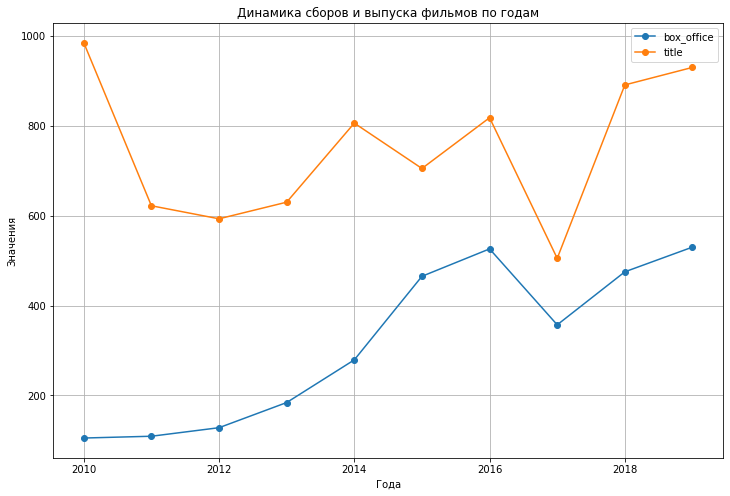

In [446]:
(
    data.pivot_table(index= 'show_start_year', values = ['title','box_office'], aggfunc='count')
    .sort_values(by='show_start_year')
    .plot(grid=True, style='-o', figsize=(12, 8))
)
plt.title('Динамика сборов и выпуска фильмов по годам')
plt.xlabel('Года')
plt.ylabel('Значения')
plt.show()

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Отличный график

In [447]:
((data.groupby('show_start_year')['box_office'].count()/data.groupby('show_start_year')['title'].count())*100).sort_values(ascending=False).to_frame()

,0
show_start_year,
2017,70.693
2015,65.957
2016,64.303
2019,56.989
2018,53.311
2014,34.615
2013,29.206
2012,21.585
2011,17.524


В 2010 году вышло больше всего фильмов, при этом данные о прокате есть только о 105 фильмах, т.е в этом году самая низкая конверсия: всего 10%. При этом в 2017 году вышло 505 фильмов и самая высокая конверсия, которая составила 70%.
По графику видно следущее: общий тренд увеличения выпуска фильмов, хотя был и спад. Прокат ведет себя не совсем эдентично, но впринципе повторяет значения количества фильмов. Изучил инет и явная причина мировой кризис 2015 - 2018 годов.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [448]:
data.groupby('show_start_year')['box_office'].agg('sum')

show_start_year
2010       2428654.000
2011      14102765.000
2012       6955423.000
2013      29799706.200
2014    7444951859.200
2015   39497365196.400
2016   47866299741.910
2017   48563707217.510
2018   49668403134.320
2019   48425708779.590
Name: box_office, dtype: float64

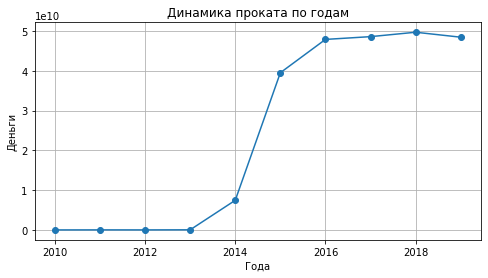

In [449]:
(
    data.groupby('show_start_year')['box_office']
    .agg('sum')
    .plot(grid=True, style='-o', figsize=(8, 4))
)
plt.title('Динамика проката по годам')
plt.xlabel('Года')
plt.ylabel('Деньги')
plt.show()

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Здорово, что не забываешь их подписывать! 

Наименьшая сумма сборов была в 2010 году, всего 2 428 654 р., наибольшая в 2018 г и составила 49 668 403 134 р.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [450]:
#сводная таблица работает, но я нашел объединением
#data.pivot_table(index= 'show_start_year', values = ['title','box_office'], 
#aggfunc=['median','mean']).sort_values(by='show_start_year') 
data.groupby('show_start_year')['box_office'].agg(['median','mean'])

,median,mean
show_start_year,,
2010,1700.000,23130.038
2011,3000.000,129383.165
2012,5660.000,54339.242
2013,3522.500,161954.925
2014,18160.000,26684415.266
2015,4920933.000,84940570.315
2016,3846679.410,91000569.852
2017,9968340.000,136032793.326
2018,8891102.210,104565059.230


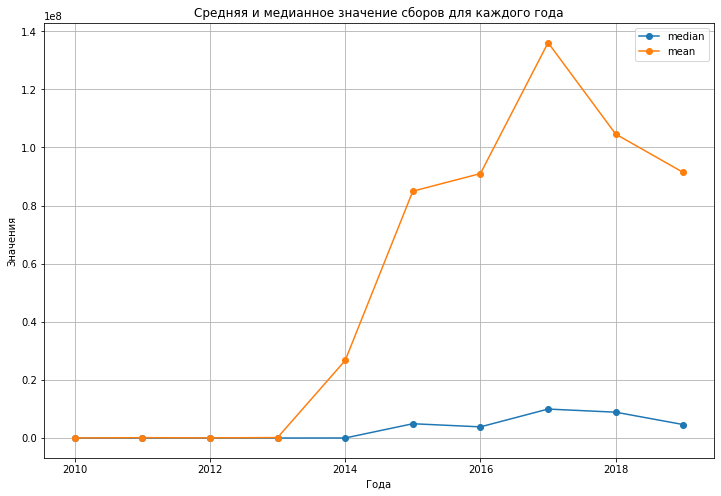

In [451]:
(
    data.groupby('show_start_year')['box_office']
    .agg(['median','mean'])
    .plot(style='-o', grid=True, figsize=(12, 8))
)
plt.title('Средняя и медианное значение сборов для каждого года')
plt.xlabel('Года')
plt.ylabel('Значения')
plt.show()

Я думаю, что средние значения хотя и скачут, но отражают общий тренд. По медианным можно сказать обратное. 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [452]:
years = data[data['show_start_year'] >= 2015]['show_start_year']

In [453]:
data.pivot_table(index= years, columns = 'age_restriction',values='box_office')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
show_start_year,,,,,
2015.000,9719348.163,186521671.355,67667386.133,41153851.268,164184893.800
2016.000,3664118.260,148834713.712,91563453.526,44992912.708,172187800.118
2017.000,76532976.667,191498235.626,154917709.918,65656432.524,268580936.572
2018.000,6489800.422,212944651.652,105792322.737,48939025.146,148602567.991
2019.000,5915355.607,149178809.102,71648421.262,55310362.315,158673440.134


In [454]:
(
    data.pivot_table(index= years, columns = 'age_restriction',values='box_office')
    .apply (['min', 'max'])   
    .style.format("{:,.2f}")
)

,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
min,"3,664,118.26","148,834,713.71","67,667,386.13","41,153,851.27","148,602,567.99"
max,"76,532,976.67","212,944,651.65","154,917,709.92","65,656,432.52","268,580,936.57"


Ну и графическая форма. (Хотя если честно голову себе сломал пока крутил этот график!!)

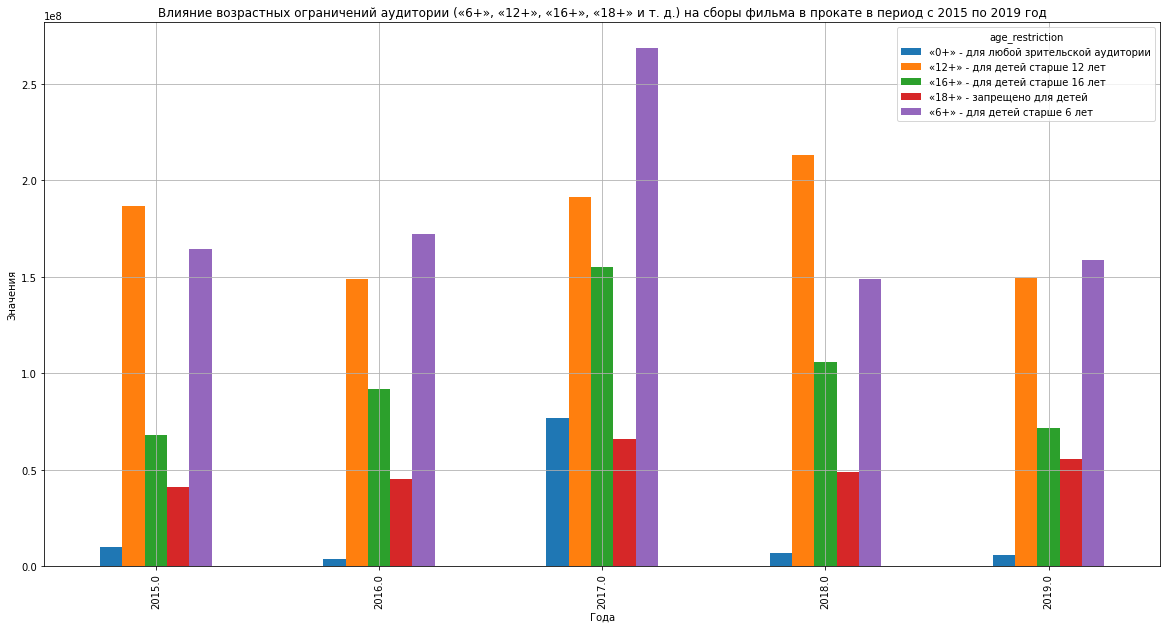

In [455]:
(
    data.pivot_table(index= years, columns = 'age_restriction',values='box_office')
    .plot(kind='bar', grid=True, figsize=(20, 10))
)
plt.title('Влияние возрастных ограничений аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год')
plt.xlabel('Года')
plt.ylabel('Значения')
plt.show()

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

"Хотя если честно голову себе сломал пока крутил этот график!!" - зато каким хорошим получился :)

Возрастные ограничения не влияют на сумму проката. Наибольшая сумма сборов у фильмов 6+, наименьшая у фильмов 0+. В 2017 году была наибольшая сумма сборов. В середине 2017 года фильмы 12+ стали собирать больше денег чем фильмы 6+, хотя в конце 2018 сборы пошли на спад. Так же, с 2016 до 2017 года сборы на фильмы 0+ стали расти и достигли своего пика в 2017 году и даже не надолго фильмы обогнали по сборам фильмы 18+, но потом началось снижение сборов и к 2018 году вернулось к цифрам 2016.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [456]:
data['gov_help'] = data['refundable_support'] +data['nonrefundable_support']

In [457]:
#общая сумма финансирования
data['gov_help'].sum()

20200688312.0

In [458]:
#всего фильмов и иных проектов
data['gov_help'].value_counts().sum()

332

На 332 проекта выделено 20 млрд. рублей

In [459]:
data['gov_help'].describe()

count         332.000
mean     60845446.723
std      72755459.467
min       3000000.000
25%      25333750.000
50%      35000000.000
75%      60000000.000
max     500000000.000
Name: gov_help, dtype: float64

К сожалению из этих данных данных однозначно сложно сделать вывод, о том какой именно проект самый успешный или нет

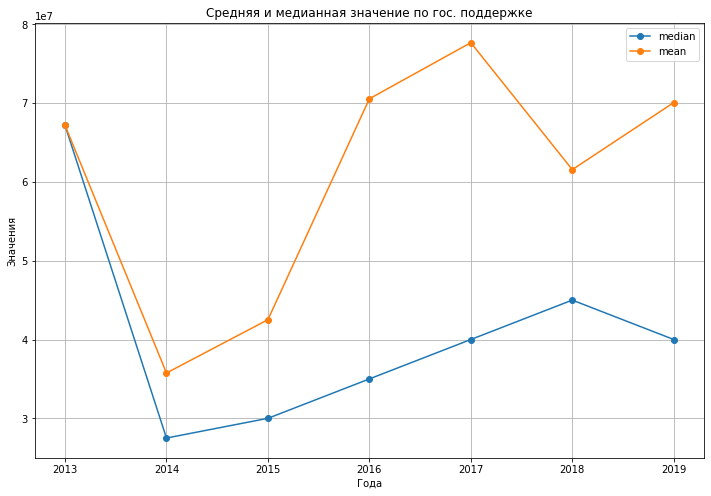

In [460]:
(
    data.groupby('show_start_year')['gov_help']
    .agg(['median','mean'])
    .plot(style='-o', grid=True, figsize=(12, 8))
)
plt.title('Средняя и медианная значение по гос. поддержке')
plt.xlabel('Года')
plt.ylabel('Значения')
plt.show()

Посмотрим какой процент фильмов с гос. поддержкой в среднем окупается:

In [461]:
data.groupby('show_start_year')['gov_help'].sum()

show_start_year
2010            0.000
2011            0.000
2012            0.000
2013    134347945.000
2014    572002299.000
2015   3656241459.000
2016   4303155482.000
2017   3183971662.000
2018   3446969465.000
2019   4904000000.000
Name: gov_help, dtype: float64

In [462]:
data.groupby('show_start_year')['gov_help'].count()

show_start_year
2010     0
2011     0
2012     0
2013     2
2014    16
2015    86
2016    61
2017    41
2018    56
2019    70
Name: gov_help, dtype: int64

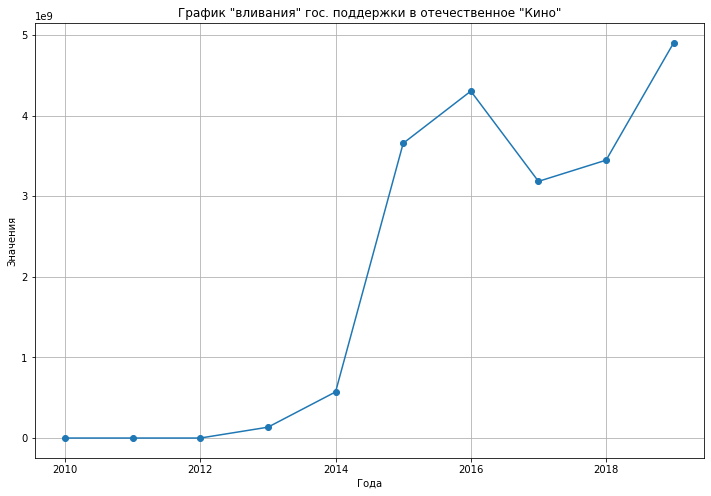

In [463]:
data.groupby('show_start_year')['gov_help'].sum().plot(style='-o', grid=True, figsize=(12, 8))
plt.title('График "вливания" гос. поддержки в отечественное "Кино"')
plt.xlabel('Года')
plt.ylabel('Значения')
plt.show()

С 2010 финансирование только растет. Были просадки в 2017. В принципе по той информации которая есть в интернете я могу сказать, что данные приближены к жизни вне зависимости от того, что мы не видим бюджетов не государственных. Радуют, что все таки какой-то ценз есть и бюджет ограничен не на все проекты. 
(Если это правдивые данные, то я в шоке сколько туда вливается государством денег. И причём без разницы кризис, не кризис.)

In [464]:
genre_gov = data.groupby('genre_first')[['gov_help', 'ratings']].agg(['count', 'sum'])

In [465]:
genre_gov.sort_values(by='genre_first', ascending=True)

gov_help                ratings          
                   count            sum   count       sum
genre_first                                              
аниме                  0          0.000      74   553.300
биография              3  112510000.000      33   231.400
боевик                 6  334000000.000     617  4016.000
вестерн                0          0.000       7    51.100
военный                9  422000866.000      46   309.400
детектив               5  485000000.000      56   372.200
детский                4  119000000.000      28   171.200
для взрослых           0          0.000       3    13.400
документальный         0          0.000     219  1585.100
драма                 93 5314406632.000    1688 11423.100
история                4 1020000000.000      26   167.300
комедия               74 3218282945.000     697  4169.800
концерт                0          0.000      12    83.100
короткометражка        0          0.000      13    86.200
криминал               3  280000000.000      39   261.200
мелодрама             15  398000000.000     383  2498.300
музыка                 0          0.000       7    51.600
мультфильм            31 2461520000.000     538  3374.300
мюзикл                 4  240453119.000      64   441.900
приключения            7  696000000.000      55   351.900
реальное ТВ            1   53000000.000       1     5.600
семейный               7  339000000.000      32   190.400
спорт                  3  455000000.000       9    64.300
триллер               15  769645285.000     521  3433.200
ужасы                 10  355000000.000     573  3242.400
фантастика            11 1406000000.000     410  2723.700
фильм-нуар             0          0.000       1     7.600
фэнтези               11 1032900000.000     358  2359.300

In [466]:
(
    data.pivot_table(index= years, columns = 'ratings',values='gov_help')
    .apply (['min', 'max'])   
    .style.format("{:,.2f}")
)

,1.0,2.5,2.8,2.9,3.0,3.1,3.2,3.3,3.5,3.9,4.0,4.2,4.3,4.5,4.6,4.7,4.8,4.9,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6.0,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7.0,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8.0,8.2,8.5,9.0,9.4
min,"25,000,000.00","100,000,000.00","30,000,000.00","45,061,957.50","200,000,000.00","30,000,000.00","20,000,000.00","25,000,000.00","60,000,000.00","30,000,000.00","6,000,000.00","25,000,000.00","33,000,000.00","50,000,000.00","28,000,000.00","25,000,000.00","45,000,000.00","25,000,000.00","35,000,000.00","35,000,000.00","18,666,666.67","32,250,000.00","8,000,000.00","40,000,000.00","26,500,000.00","35,000,000.00","40,000,000.00","27,500,000.00","31,000,000.00","27,500,000.00","26,733,333.33","20,000,000.00","44,500,000.00","28,000,000.00","30,000,000.00","27,333,333.33","45,000,000.00","34,450,000.00","11,520,000.00","25,000,000.00","25,300,000.00","25,000,000.00","25,000,000.00","27,510,000.00","30,000,000.00","21,700,000.00","25,000,000.00","97,000,000.00","3,000,000.00","140,000,000.00","150,000,000.00","4,700,000.00","10,000,000.00"
max,"25,000,000.00","100,000,000.00","30,000,000.00","45,061,957.50","200,000,000.00","30,000,000.00","75,000,000.00","25,000,000.00","60,000,000.00","30,000,000.00","25,000,000.00","25,000,000.00","36,000,000.00","100,000,000.00","160,000,000.00","50,000,000.00","58,333,333.33","100,000,000.00","70,000,000.00","60,000,000.00","80,000,000.00","35,000,000.00","31,966,666.67","62,500,000.00","250,000,000.00","267,500,000.00","150,000,000.00","77,000,000.00","280,000,000.00","61,250,000.00","100,600,000.00","80,000,866.00","190,000,000.00","162,672,500.00","242,500,000.00","70,000,000.00","142,500,000.00","70,000,000.00","50,666,666.67","85,000,000.00","31,000,000.00","31,666,666.67","225,000,000.00","325,000,000.00","442,104,482.00","300,000,000.00","80,000,000.00","120,000,000.00","37,346,881.00","140,000,000.00","210,000,000.00","4,700,000.00","10,000,000.00"


Две таблички, но они очень тяжкие для анализа. Попробую конкретизировать данные.
Да мы русские любим всё ДРАМАТИЗИРОВАТЬ, ПОСМЕЯТЬСЯ (Комедии), ну и куда без детей (мультфильм).

In [467]:
data['budget'].max()

2305074303.0

In [468]:
data.loc[data['budget'] == 2305074303.0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,show_start_year,director_first,genre_first,ratio_help_to_budget,gov_help
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.000,...,2305074303.000,Фонд кино,5.800,"приключения,фэнтези",333597059.590,2019,О.Степченко,приключения,11.71,270000000.000


Самый дорогой фильм

In [469]:
data.pivot_table(index= 'director', values = ['gov_help']).sort_values(by='gov_help',ascending=False).head(10)

,gov_help
director,
Ф.Бондарчук,500000000.000
А.Кравчук,500000000.000
А.Мизгирев,450000000.000
Н.Лебедев,442104482.000
А.Мегердичев,400000000.000
И.Шурховецкий,350000000.000
А.Учитель,300000000.000
О.Степченко,270000000.000
Д.Козловский,260000000.000


Больше всего денег выделяют на фильмы Ф.Бондарчука и А.Кравчука

In [470]:
data.pivot_table(index= 'genre_first', values = ['gov_help']).sort_values(by='gov_help',ascending=False).head(10)

,gov_help
genre_first,
история,255000000.000
спорт,151666666.667
фантастика,127818181.818
приключения,99428571.429
детектив,97000000.000
фэнтези,93900000.000
криминал,93333333.333
мультфильм,79403870.968
мюзикл,60113279.750


Чаще всего выделяют деньги на исторические фильмы

In [471]:
data.pivot_table(index= 'title', values = ['ratings','budget','gov_help']).sort_values(by='ratings',ascending=False).head(10)

,budget,gov_help,ratings
title,,,
Сказка о добре и Вре,NaN,NaN,9.900
Спираль.,NaN,NaN,9.900
Прошлое,NaN,NaN,9.900
Животные рядом со Святыми,NaN,NaN,9.900
Колесо времени,NaN,NaN,9.800
ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,NaN,NaN,9.800
Песочный человек,NaN,NaN,9.700
"Машины Страшилки. Серия ""Жутчайшая повесть о полезных изобретениях""",NaN,NaN,9.700
Круиз.,NaN,NaN,9.700


Если сравнивать рейтинг с информацией в интернете наши данные не правильные

### Шаг 5. Напишите общий вывод

Проведена предобработка данных:

- В первой части работы мы подгрузили файлы с данными и объедините их в один датафрейм. Проверили типы данных в датафрейме и преобразуйте там, где это необходимо. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать.

- Пропуски:
У столбцов refundable_support, nonrefundable_support, budget, financing_source одинаковое количество пропусков 7153 (96%). Это означает, что в базе нет данных по финансированию внебюджетных обязательств. Пропуски в genres 975 (13%) и ratings 966 (13%). Я не нашел взаимосвязи в пропусках. Заполнять выделяя среднее по жанрам, считаю не правильно. В идеале нужно находить фильмы вручну на Кинопоиске и заносить данные. То же самое сделаем и с пропущенными значениями в столбце producer 568 (8%), но это слишком большое значение чтобы его заполнить вручную.


- Дубликаты в данных: Дубликатов в данных не выявлено. Дубликаты в прокатных удостоверениях это нормально.

- Категориальные значения: Больше всего фильмов в категории "для детей старше 16 лет"- 2851 шт. Категорирование жанров фильмов сделано смешанными жанрами что усложняет их анализ.

- Количественные значения: значения изучены. К сожалению значений "refundable_support — объём возвратных средств государственной поддержки", "nonrefundable_support — объём невозвратных средств государственной поддержки", "budget — общий бюджет фильма", "box_office — сборы в рублях" восстановить не смог.

- Все необходимые столбцы созданы: столбец с информацией о годе проката, с именем и фамилией главного режиссёра и основным жанром фильма. Создан отдельный столбец с долей от общего бюджета фильма составляющего государственную поддержку.

Проведен исследовательский анализ данных: (для лучшего понимания смотрите цифры и графики)

- В 2010 году вышло больше всего фильмов, при этом данные о прокате есть только о 105 фильмах, т.е в этом году самая низкая конверсия: всего 10%. При этом в 2017 году вышло 505 фильмов и самая высокая конверсия, которая составила 70%.
По графику видно следущее: общий тренд увеличения выпуска фильмов, хотя был и спад. Прокат ведет себя не совсем эдентично, но впринципе повторяет значения количества фильмов. Изучил инет и явная причина мировой кризис 2015 - 2018 годов.

- Наименьшая сумма сборов была в 2010 году, всего 2 428 654 р., наибольшая в 2018 г и составила 49 668 403 134 р.

- Средние значения хотя и скачут, но отражают общий тренд развития киноиндустрии в РФ за изучаемый период. По медианным можно сказать обратное. 

- Возрастные ограничения не влияют на сумму проката. Наибольшая сумма сборов у фильмов 6+, наименьшая у фильмов 0+. В 2017 году была наибольшая сумма сборов. В середине 2017 года фильмы 12+ стали собирать больше денег чем фильмы 6+, хотя в конце 2018 сборы пошли на спад. Так же, с 2016 до 2017 года сборы на фильмы 0+ стали расти и достигли своего пика в 2017 году и даже не надолго фильмы обогнали по сборам фильмы 18+, но потом началось снижение сборов и к 2018 году вернулось к цифрам 2016.

Анализ фильмов с государственной поддержкой

- всего фильмов и иных проектов 332 шт.

- общая сумма финансирования 20200688312.0 руб.

- С 2010 финансирование только растет. Были просадки в 2017. В принципе по той информации которая есть в интернете я могу сказать, что данные приближены к жизни вне зависимости от того, что мы не видим бюджетов не государственных. 

- Самый дорогой фильм "Тайна печати дракона"

- Больше всего денег выделяют на фильмы Ф.Бондарчука и А.Кравчука

- Чаще всего выделяют деньги на исторические фильмы